## Import Library

In [216]:
# Data processing, JSON-handling, & visualization libraries
import joblib
import pandas as pd
import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Sklearn libraries, preprocessing steps, & decision tree model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from kmodes.kprototypes import KPrototypes

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [217]:
# Load the *fitted* ColumnTransformer you saved earlier
preprocessor = joblib.load("../data/processed/14_processed_df.pkl")

# Rebuild X (same as in notebook A)
import pandas as pd, json
df = pd.read_csv("../data/processed/11_biz_merged_clean.csv")

In [218]:
preprocessor

,transformers,"[('cont', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [219]:
df


,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,cat__Caterers,cat__Specialty Food,cat__Bakeries,cat__Desserts,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,True,4.394449,False,False,...,0,0,1,0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.450000,0.050000
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,True,1.945910,False,True,...,0,0,0,0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.000000,0.000000
2,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,36.208102,-86.768170,10.0,True,2.397895,False,True,...,0,0,0,0,5,1.800000,2019-01-05 01:28:55,2021-04-15 19:16:33,111.200000,0.000000
3,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,27.955269,-82.456320,10.0,True,2.397895,NaN,NaN,...,0,0,0,0,8,4.250000,2019-01-16 18:22:34,2022-01-03 01:18:29,91.875000,0.000000
4,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,39.637133,-86.127217,28.0,True,3.367296,NaN,True,...,0,0,0,0,12,2.250000,2019-01-01 19:58:17,2021-04-22 13:58:42,97.833336,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36256,w_4xUt-1AyY2ZwKtnjW0Xg,Boise,ID,43.616590,-116.202383,998.0,True,6.906755,NaN,True,...,0,0,0,0,358,4.159218,2019-01-06 22:34:06,2022-01-17 04:48:36,72.849160,0.203911
36257,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,PA,39.925656,-75.310344,11.0,True,2.484907,NaN,True,...,0,0,0,0,4,3.250000,2019-05-18 17:10:48,2020-10-03 12:15:40,97.000000,0.000000
36258,cM6V90ExQD6KMSU3rRB5ZA,Boise,ID,43.615401,-116.284689,33.0,True,3.526361,NaN,True,...,0,0,0,0,13,3.538461,2019-05-03 01:29:57,2021-11-25 03:35:25,41.153847,0.153846
36259,WnT9NIzQgLlILjPT0kEcsQ,Philadelphia,PA,39.935982,-75.158665,35.0,True,3.583519,NaN,True,...,0,0,0,0,21,4.380952,2019-02-05 18:46:22,2021-03-31 02:36:00,63.000000,0.142857


In [220]:
df.head()

,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,cat__Caterers,cat__Specialty Food,cat__Bakeries,cat__Desserts,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,True,4.394449,False,False,...,0,0,1,0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.450000,0.05
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,True,1.945910,False,True,...,0,0,0,0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.000000,0.00
2,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,36.208102,-86.768170,10.0,True,2.397895,False,True,...,0,0,0,0,5,1.800000,2019-01-05 01:28:55,2021-04-15 19:16:33,111.200000,0.00
3,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,27.955269,-82.456320,10.0,True,2.397895,NaN,NaN,...,0,0,0,0,8,4.250000,2019-01-16 18:22:34,2022-01-03 01:18:29,91.875000,0.00
4,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,39.637133,-86.127217,28.0,True,3.367296,NaN,True,...,0,0,0,0,12,2.250000,2019-01-01 19:58:17,2021-04-22 13:58:42,97.833336,0.00


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   business_id                      36261 non-null  object 
 1   city                             36261 non-null  object 
 2   state                            36261 non-null  object 
 3   latitude                         36261 non-null  float64
 4   longitude                        36261 non-null  float64
 5   review_count                     36261 non-null  float64
 6   is_open                          36261 non-null  bool   
 7   review_count_log1p               36261 non-null  float64
 8   attr_ByAppointmentOnly           3139 non-null   object 
 9   attr_BusinessAcceptsCreditCards  31372 non-null  object 
 10  attr_BikeParking                 26853 non-null  object 
 11  attr_RestaurantsPriceRange2      29672 non-null  float64
 12  attr_RestaurantsTa

In [222]:
import pandas as pd
import numpy as np

# --- 1. Convert datetime columns ---
datetime_cols = ["first_review_2019", "last_review_2019"]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# --- 2. Convert boolean columns (True/False or Yes/No or t/f) ---
bool_cols = [
    "is_open", "attr_ByAppointmentOnly", "attr_BusinessAcceptsCreditCards",
    "attr_BikeParking", "attr_RestaurantsTakeOut", "attr_RestaurantsDelivery",
    "attr_Caters", "attr_WheelchairAccessible", "attr_HappyHour",
    "attr_OutdoorSeating", "attr_HasTV", "attr_RestaurantsReservations",
    "attr_DogsAllowed", "attr_GoodForKids", "attr_RestaurantsTableService",
    "attr_RestaurantsGoodForGroups", "attr_DriveThru", "has_hours_info", "attr_Smoking"
]

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace(
            {"True": True, "False": False, "Yes": True, "No": False, "None": np.nan, "nan": np.nan}
        )
        df[col] = df[col].astype("boolean")

# --- 3. Convert category columns ---
category_cols = [
    "attr_RestaurantsPriceRange2", "attr_WiFi", "attr_Alcohol",
    "attr_RestaurantsAttire", "attr_NoiseLevel"
]
for col in category_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

# --- 4. Convert small integer columns to int8 for memory efficiency ---
int8_cols = [
    "cat__Sandwiches", "cat__American (Traditional)", "cat__Pizza",
    "cat__Fast Food", "cat__Breakfast & Brunch", "cat__American (New)",
    "cat__Burgers", "cat__Mexican", "cat__Italian", "cat__Coffee & Tea",
    "cat__Seafood", "cat__Chinese", "cat__Salad", "cat__Chicken Wings",
    "cat__Cafes", "cat__Delis", "cat__Caterers", "cat__Specialty Food",
    "cat__Bakeries", "cat__Desserts"
]
for col in int8_cols:
    if col in df.columns:
        df[col] = df[col].astype("int8")

# --- 5. Convert others explicitly to float if not already ---
float_cols = [
    "latitude", "longitude", "review_count", "review_count_log1p",
    "total_weekly_hours", "days_open", "weekend_hours", "avg_daily_hours",
    "avg_stars_2019", "rl_word_mean", "rl_share_short24"
]
for col in float_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("float64")

# --- 6. Optional: compress integers like rev_count_2019 ---
df["rev_count_2019"] = df["rev_count_2019"].astype("int64")




/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_24937/1570642750.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].astype(str).str.strip().replace(
/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_24937/1570642750.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].astype(str).str.strip().replace(


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   business_id                      36261 non-null  object        
 1   city                             36261 non-null  object        
 2   state                            36261 non-null  object        
 3   latitude                         36261 non-null  float64       
 4   longitude                        36261 non-null  float64       
 5   review_count                     36261 non-null  float64       
 6   is_open                          36261 non-null  boolean       
 7   review_count_log1p               36261 non-null  float64       
 8   attr_ByAppointmentOnly           3139 non-null   boolean       
 9   attr_BusinessAcceptsCreditCards  31372 non-null  boolean       
 10  attr_BikeParking                 26853 non-null  boolean  

In [224]:
# Columns to exclude from predictors
exclude = {
    "business_id", "city", "state",
     "review_count",
    "rev_count_2019", "first_review_2019", "last_review_2019",
}

# Build X (everything except target + excluded)

feature_cols = [c for c in df.columns if c not in exclude]
df = df[feature_cols].copy()

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   latitude                         36261 non-null  float64 
 1   longitude                        36261 non-null  float64 
 2   is_open                          36261 non-null  boolean 
 3   review_count_log1p               36261 non-null  float64 
 4   attr_ByAppointmentOnly           3139 non-null   boolean 
 5   attr_BusinessAcceptsCreditCards  31372 non-null  boolean 
 6   attr_BikeParking                 26853 non-null  boolean 
 7   attr_RestaurantsPriceRange2      29672 non-null  category
 8   attr_RestaurantsTakeOut          33187 non-null  boolean 
 9   attr_RestaurantsDelivery         31363 non-null  boolean 
 10  attr_Caters                      25596 non-null  boolean 
 11  attr_WiFi                        27525 non-null  category
 12  attr

## Step 1: Transform all column to numeric (float) and categorical then convert categorical as string 1 or 0

In [226]:
# Treat cat__* one-hot flags (int8) as categorical
cat_int8   = [c for c in df.columns if df[c].dtype == "int8" and c.startswith("cat__")]

# Booleans are categorical for K-Proto
bool_cols  = df.select_dtypes(include="boolean").columns.tolist()

# Native object/category dtypes are categorical
cat_native = df.select_dtypes(include=["object","category"]).columns.tolist()

# Final categorical set
cat_cols = sorted(set(cat_int8 + bool_cols + cat_native))

# Everything else is numeric
num_cols = [c for c in df.columns if c not in cat_cols]

print(f"Categorical: {len(cat_cols)} | Numeric: {len(num_cols)}")
print("Sample categorical:", cat_cols[:10])
print("Sample numeric:",   [c for c in num_cols if c in ["avg_stars_2019","review_count_log1p","latitude","longitude"]])


Categorical: 44 | Numeric: 10
Sample categorical: ['attr_Alcohol', 'attr_BikeParking', 'attr_BusinessAcceptsCreditCards', 'attr_ByAppointmentOnly', 'attr_Caters', 'attr_DogsAllowed', 'attr_DriveThru', 'attr_GoodForKids', 'attr_HappyHour', 'attr_HasTV']
Sample numeric: ['latitude', 'longitude', 'review_count_log1p', 'avg_stars_2019']


## Step 2 — Impute missing values

In [227]:
# --- 1) Numeric columns: fill NaN with mean ---
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")  # force numeric
    df[c] = df[c].fillna(df[c].mean())

# --- 2) Boolean columns: cast to "True"/"False" strings ---
for c in bool_cols:
    df[c] = df[c].astype(str).replace({"<NA>": "Unknown"}).fillna("Unknown")

# --- 3) Native object/category columns: ensure string and fill NaN ---
for c in cat_native:
    df[c] = df[c].astype(str).replace({"<NA>": "Unknown"}).fillna("Unknown")

# --- 4) cat__* one-hot columns (int8): convert to string "0"/"1" ---
for c in cat_int8:
    df[c] = df[c].astype(str)

print("✅ Conversion done.")
print(df[cat_cols].head(3))


✅ Conversion done.
  attr_Alcohol attr_BikeParking attr_BusinessAcceptsCreditCards  \
0          nan             True                           False   
1          nan            False                            True   
2          nan          Unknown                            True   

  attr_ByAppointmentOnly attr_Caters attr_DogsAllowed attr_DriveThru  \
0                  False        True          Unknown        Unknown   
1                  False       False            False           True   
2                  False       False            False           True   

  attr_GoodForKids attr_HappyHour attr_HasTV  ... cat__Fast Food cat__Italian  \
0          Unknown        Unknown    Unknown  ...              0            0   
1             True          False       True  ...              1            0   
2             True          False       True  ...              1            0   

  cat__Mexican cat__Pizza cat__Salad cat__Sandwiches cat__Seafood  \
0            0          0    

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   latitude                         36261 non-null  float64
 1   longitude                        36261 non-null  float64
 2   is_open                          36261 non-null  object 
 3   review_count_log1p               36261 non-null  float64
 4   attr_ByAppointmentOnly           36261 non-null  object 
 5   attr_BusinessAcceptsCreditCards  36261 non-null  object 
 6   attr_BikeParking                 36261 non-null  object 
 7   attr_RestaurantsPriceRange2      36261 non-null  object 
 8   attr_RestaurantsTakeOut          36261 non-null  object 
 9   attr_RestaurantsDelivery         36261 non-null  object 
 10  attr_Caters                      36261 non-null  object 
 11  attr_WiFi                        36261 non-null  object 
 12  attr_WheelchairAcc

## Step 3: compute categorical indices

In [229]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['is_open', 'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards', 'attr_BikeParking', 'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut', 'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi', 'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating', 'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed', 'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire', 'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups', 'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking', 'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)', 'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch', 'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian', 'cat__Coffee & Tea', 'cat__Seafood', 'cat__Chinese', 'cat__Salad', 'cat__Chicken Wings', 'cat__Cafes', 'cat__Delis', 'cat__Caterers', 'cat__Specialty Food', 'cat__Bakeries', 'cat__Desserts']
Categorical columns position  : [2, 4, 5, 6, 7, 8, 9, 10

In [230]:
df_cat=df[['is_open', 'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards', 'attr_BikeParking', 'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut', 'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi', 'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating', 'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed', 'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire', 'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups', 'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking', 'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)', 'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch', 'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian', 'cat__Coffee & Tea', 'cat__Seafood', 'cat__Chinese', 'cat__Salad', 'cat__Chicken Wings', 'cat__Cafes', 'cat__Delis', 'cat__Caterers', 'cat__Specialty Food', 'cat__Bakeries', 'cat__Desserts']]
for i in df_cat.columns:
    print(df_cat[i].unique())

['True' 'False']
['False' 'Unknown' 'True']
['False' 'True' 'Unknown']
['True' 'False' 'Unknown']
['1.0' 'nan' '2.0' '3.0' '4.0']
['True' 'Unknown' 'False']
['False' 'True' 'Unknown']
['True' 'False' 'Unknown']
['free' 'no' 'nan' 'paid']
['Unknown' 'True' 'False']
['Unknown' 'False' 'True']
['False' 'True' 'Unknown']
['Unknown' 'True' 'False']
['Unknown' 'False' 'True']
['Unknown' 'False' 'True']
['nan' 'full_bar' 'beer_and_wine']
['Unknown' 'True' 'False']
['nan' 'casual' 'dressy' 'formal']
['Unknown' 'False' 'True']
['Unknown' 'True' 'False']
['Unknown' 'True' 'False']
['nan' 'average' 'quiet' 'loud' 'very_loud']
['Unknown' 'False' 'True']
['False' 'True']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['1' '0']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['0' '1']
['1' '0']
['0' '1']


In [231]:
#transform categorical labels to numerical labels
df_cat=df[['is_open', 'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards', 'attr_BikeParking', 'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut', 'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi', 'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating', 'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed', 'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire', 'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups', 'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking', 'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)', 'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch', 'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian', 'cat__Coffee & Tea', 'cat__Seafood', 'cat__Chinese', 'cat__Salad', 'cat__Chicken Wings', 'cat__Cafes', 'cat__Delis', 'cat__Caterers', 'cat__Specialty Food', 'cat__Bakeries', 'cat__Desserts']]
encoders={}
for col_name in df_cat.columns:
    series = df_cat[col_name]
    label_encoder = LabelEncoder()
    df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_24937/3201821680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_24937/3201821680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_24937/3201821680.py:7: Settin

In [232]:
print('Numerical columns           : {}'.format(list(df.select_dtypes('float64').columns)))

Numerical columns           : ['latitude', 'longitude', 'review_count_log1p', 'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours', 'avg_stars_2019', 'rl_word_mean', 'rl_share_short24']


In [233]:
# Handling Missing Values using Knn for both categorical and numerical labels 
#Numerical values
df_num=df[['latitude', 'longitude', 'review_count_log1p', 'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours', 'avg_stars_2019', 'rl_word_mean', 'rl_share_short24']]
imputer = KNNImputer(n_neighbors=5)
df_num.loc[:]=imputer.fit_transform(df_num)
#categorical values
imputer = KNNImputer(n_neighbors=1)
df_cat.loc[:]=imputer.fit_transform(df_cat)
#concatenate the data
df=pd.concat([df_cat,df_num], axis=1)

In [234]:
#Load Data
pca = PCA(2)
#Transform the data
d_f= pca.fit_transform(df)
 
d_f.shape

(36261, 2)

In [235]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()

## Step 4 Clustering

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


<function matplotlib.pyplot.show(close=None, block=None)>

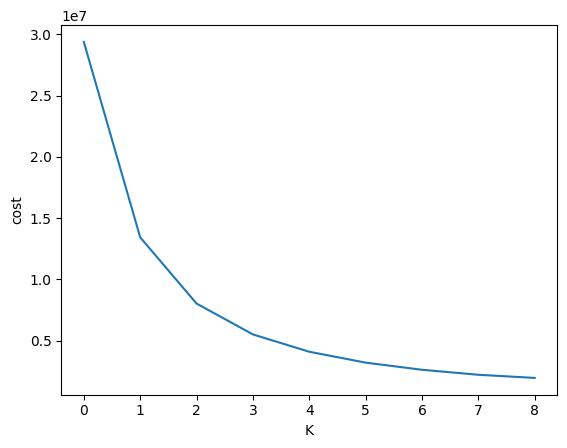

In [236]:
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

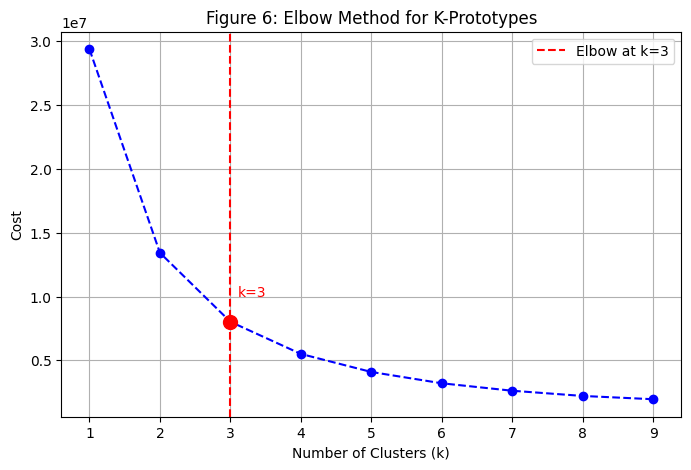

In [255]:
import matplotlib.pyplot as plt

K = range(1, len(cost) + 1)

plt.figure(figsize=(8,5))
plt.plot(K, cost, marker='o', linestyle='--', color='b')

# --- Add a red marker for the elbow ---
elbow_k = 3  # the k value you identified as the elbow
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at k={elbow_k}')
plt.scatter(elbow_k, cost[elbow_k - 1], color='red', s=100, zorder=5)  # red dot
plt.text(elbow_k + 0.1, cost[elbow_k - 1] + 2e6, f'k={elbow_k}', color='red')

# --- Add labels and style ---
plt.title('Figure 6: Elbow Method for K-Prototypes')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()


In [238]:
#!pip install kneed

In [239]:
from kneed import KneeLocator

Ks = range(1, len(cost) + 1)  # match your cost list length

knee = KneeLocator(
    x=Ks,
    y=cost,
    S=0.1,                 # try 0.05–0.3 if None is returned
    curve="convex",        # cost should be convex & decreasing
    direction="decreasing",
    online=True
)

elbow_k = knee.elbow
print("elbow at k =", f"{int(elbow_k)} clusters" if elbow_k else "not detected")


elbow at k = 3 clusters


## Build Model

In [240]:
#let's build the Kprototype model with 3 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
df['clusters']= kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [241]:
#predict the labels of clusters.
label = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
print(label)

[1 1 0 ... 1 1 1]


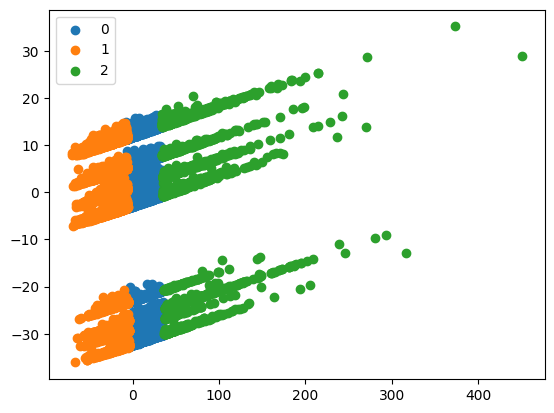

In [242]:
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1], label = i)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Figure 8: Cluster size')

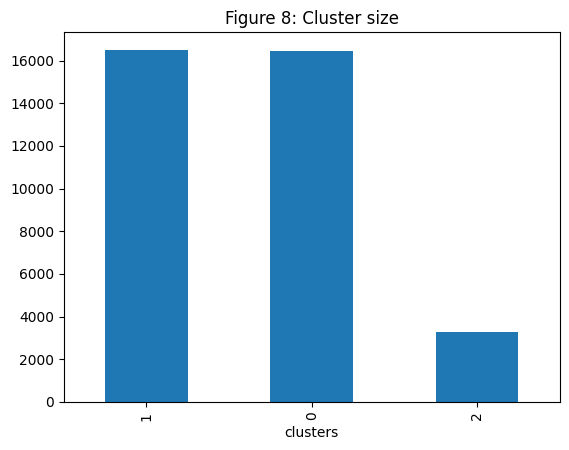

In [257]:
#the volume of each cluster
df['clusters'].value_counts().plot(kind='bar')
plt.title("Figure 8: Cluster size")

In [ ]:
#stats of numerical data by mean
df.groupby(['clusters']).mean()

In [245]:
#stats of categorical data by mode
df.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['is_open', 'attr_ByAppointmentOnly', 'attr_BusinessAcceptsCreditCards', 'attr_BikeParking', 'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut', 'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi', 'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating', 'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed', 'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire', 'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups', 'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking', 'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)', 'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch', 'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian', 'cat__Coffee & Tea', 'cat__Seafood', 'cat__Chinese', 'cat__Salad', 'cat__Chicken Wings', 'cat__Cafes', 'cat__Delis', 'cat__Caterers', 'cat__Specialty Food', 'cat__Bakeries', 'cat__Desserts']]

,is_open,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_BikeParking,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_RestaurantsDelivery,attr_Caters,attr_WiFi,attr_WheelchairAccessible,...,cat__Seafood,cat__Chinese,cat__Salad,cat__Chicken Wings,cat__Cafes,cat__Delis,cat__Caterers,cat__Specialty Food,cat__Bakeries,cat__Desserts
clusters,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,1,1,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,1,0,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,1,1,1,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0


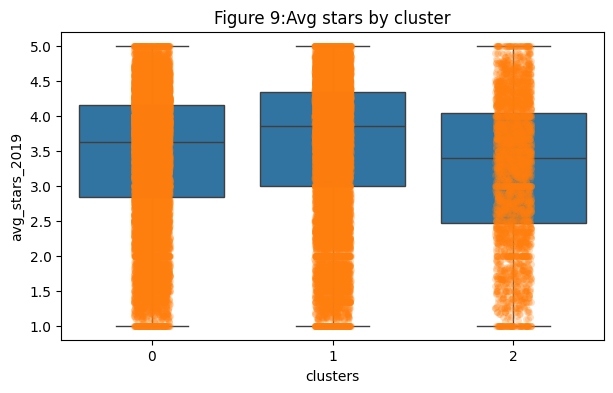

In [263]:
import seaborn as sns, matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='clusters', y='avg_stars_2019')
sns.stripplot(data=df, x='clusters', y='avg_stars_2019', alpha=0.25)
plt.title("Figure 9:Avg stars by cluster")
plt.show()


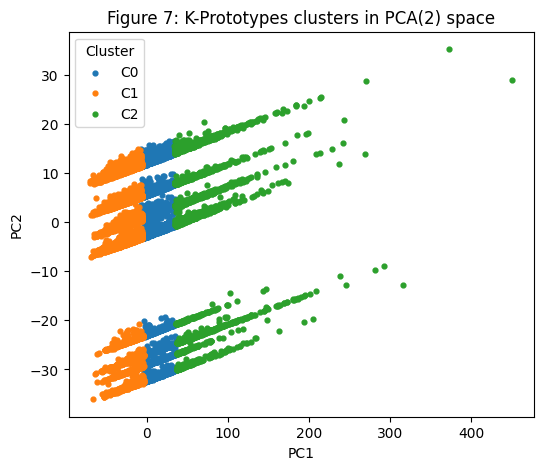

In [256]:
plt.figure(figsize=(6,5))
for c in np.unique(label):
    plt.scatter(d_f[label==c, 0], d_f[label==c, 1], s=12, label=f"C{c}")
plt.legend(title="Cluster")
plt.title("Figure 7: K-Prototypes clusters in PCA(2) space")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


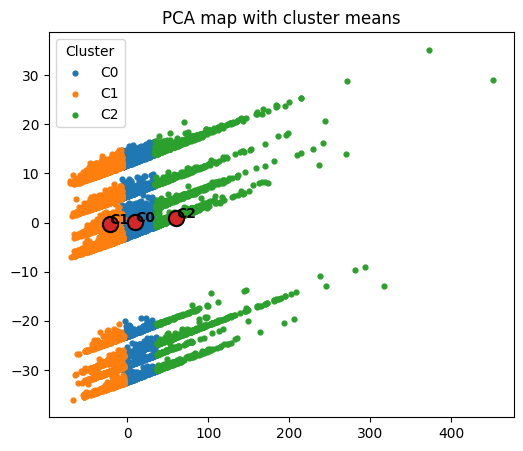

In [249]:
centroid2d = np.vstack([d_f[label==c].mean(axis=0) for c in np.unique(label)])
plt.figure(figsize=(6,5))
for c in np.unique(label):
    plt.scatter(d_f[label==c, 0], d_f[label==c, 1], s=12, label=f"C{c}")
plt.scatter(centroid2d[:,0], centroid2d[:,1], s=120, edgecolor='k', linewidth=1.5)
for i,(x,y) in enumerate(centroid2d):
    plt.text(x, y, f"C{i}", weight='bold')
plt.legend(title="Cluster"); plt.title("PCA map with cluster means")
plt.show()


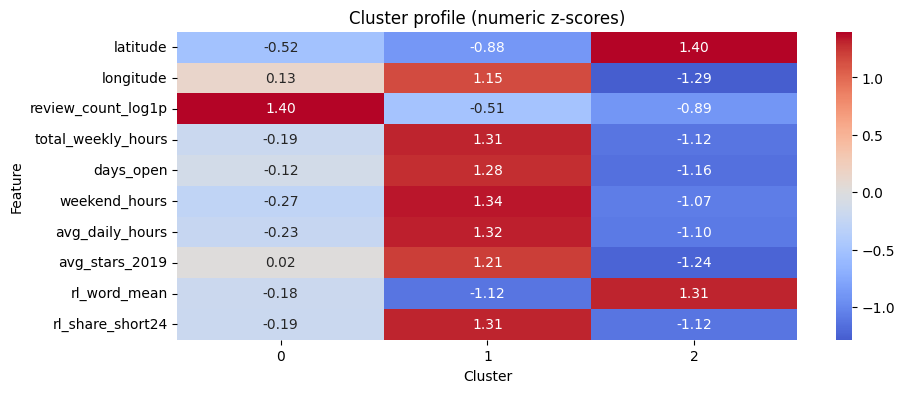

In [250]:
numeric_cols = ['latitude','longitude','review_count_log1p','total_weekly_hours',
                'days_open','weekend_hours','avg_daily_hours','avg_stars_2019',
                'rl_word_mean','rl_share_short24']

profile_num = df.groupby('clusters')[numeric_cols].mean()
z = (profile_num - profile_num.mean()) / profile_num.std(ddof=0)

plt.figure(figsize=(10,4))
sns.heatmap(z.T, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Cluster profile (numeric z-scores)"); plt.ylabel("Feature"); plt.xlabel("Cluster")
plt.show()


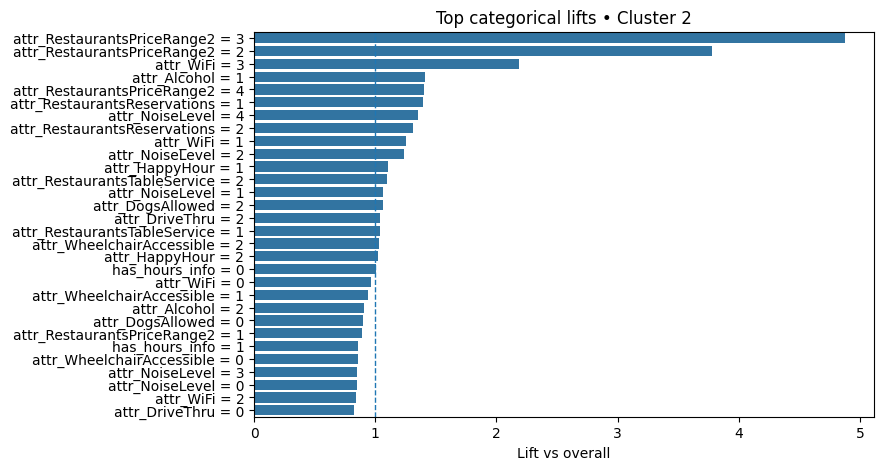

In [272]:
cat_cols_focus = [
    'attr_RestaurantsPriceRange2','attr_Alcohol','attr_NoiseLevel','attr_WiFi',
    'attr_RestaurantsReservations','attr_RestaurantsTableService','attr_DogsAllowed',
    'attr_WheelchairAccessible','attr_DriveThru','attr_HappyHour','has_hours_info'
]

def top_lift_for_cluster(df, cluster, cat_cols, topk=30):
    out = []
    sub = df[df['clusters']==cluster]
    for c in cat_cols:
        # treat as string categories (you encoded earlier—OK)
        vc_all = df[c].value_counts(normalize=True)
        vc_sub = sub[c].value_counts(normalize=True)
        for lev, p_sub in vc_sub.items():
            p_all = vc_all.get(lev, 0)
            if p_all > 0:
                lift = p_sub / p_all
                out.append((c, lev, p_sub, p_all, lift))
    res = (pd.DataFrame(out, columns=['feature','level','p_cluster','p_overall','lift'])
             .sort_values('lift', ascending=False))
    return res.head(topk)

cluster = 2 # change 0/1/2
topk0 = top_lift_for_cluster(df, cluster, cat_cols_focus, topk=30)

plt.figure(figsize=(8,5))
sns.barplot(data=topk0, x='lift', y=topk0['feature'] + " = " + topk0['level'].astype(str))
plt.axvline(1.0, ls='--', lw=1)
plt.title(f"Top categorical lifts • Cluster {cluster}")
plt.xlabel("Lift vs overall"); plt.ylabel("")
plt.show()


In [259]:
mode_table = df.groupby('clusters').agg(lambda x: pd.Series.mode(x).iat[0])
display(mode_table.T)


clusters,0,1,2
is_open,1.000000,1.000000,1.000000
attr_ByAppointmentOnly,2.000000,2.000000,2.000000
attr_BusinessAcceptsCreditCards,1.000000,1.000000,1.000000
attr_BikeParking,1.000000,1.000000,1.000000
attr_RestaurantsPriceRange2,1.000000,0.000000,1.000000
attr_RestaurantsTakeOut,1.000000,1.000000,1.000000
attr_RestaurantsDelivery,1.000000,1.000000,1.000000
attr_Caters,1.000000,1.000000,2.000000
attr_WiFi,0.000000,0.000000,0.000000
attr_WheelchairAccessible,2.000000,2.000000,2.000000


In [260]:
modes = df.groupby('clusters').agg(lambda x: pd.Series.mode(x).iat[0])
decoded_modes = modes.copy()

for col, le in encoders.items():
    if col in decoded_modes.columns:
        decoded_modes[col] = le.inverse_transform(decoded_modes[col].astype(int))

decoded_modes.T  # each column = cluster, rows = readable labels


clusters,0,1,2
is_open,True,True,True
attr_ByAppointmentOnly,Unknown,Unknown,Unknown
attr_BusinessAcceptsCreditCards,True,True,True
attr_BikeParking,True,True,True
attr_RestaurantsPriceRange2,2.0,1.0,2.0
attr_RestaurantsTakeOut,True,True,True
attr_RestaurantsDelivery,True,True,True
attr_Caters,True,True,Unknown
attr_WiFi,free,free,free
attr_WheelchairAccessible,Unknown,Unknown,Unknown


In [262]:
# Calculate average stars by cluster
avg_stars_by_cluster = df.groupby('clusters')['avg_stars_2019'].median().round(3)

print(avg_stars_by_cluster)


clusters
0    3.625
1    3.857
2    3.400
Name: avg_stars_2019, dtype: float64
